

Filtered Galaxy Properties and Units : 
{'CentralGal': b'None', 'Mvir': b'1e10 solMass', 'HaloID': b'None', 'Sfr': b'solMass/yr', 'HIMass': b'1e10 solMass', 'StellarMass': b'1e10 solMass', 'Pos': b'Mpc'}

gals: 
 [8.620877  7.9230638 9.368519  ...      -inf      -inf      -inf]
new mf array item: 
 [[7.53999996e+00 2.57931856e-01]
 [7.61999989e+00 2.78740176e-01]
 [7.69999981e+00 2.84847228e-01]
 [7.77999973e+00 2.77170607e-01]
 [7.86000013e+00 2.57934051e-01]
 [7.94000006e+00 2.35966663e-01]
 [8.02000046e+00 2.07901005e-01]
 [8.10000038e+00 1.81657364e-01]
 [8.18000031e+00 1.57402576e-01]
 [8.26000023e+00 1.32370686e-01]
 [8.34000015e+00 1.09670101e-01]
 [8.42000008e+00 9.01349980e-02]
 [8.50000000e+00 7.20487279e-02]
 [8.57999992e+00 5.80521194e-02]
 [8.65999985e+00 4.62770553e-02]
 [8.73999977e+00 3.72108707e-02]
 [8.81999969e+00 3.08338086e-02]
 [8.89999962e+00 2.51965296e-02]
 [8.97999954e+00 2.08741767e-02]
 [9.06000042e+00 1.73333157e-02]
 [9.14000034e+00 1.42029575e-02]
 [9.2

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log10


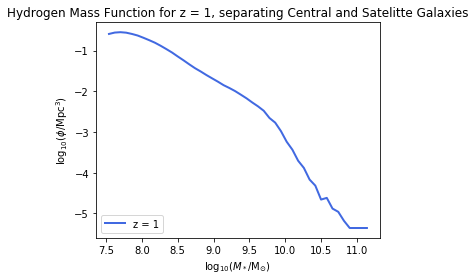

In [8]:
# Code to plot the Hydrogen mass functions with satelittes and centrals separately and on the same graph
# for z = 1

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput

# First set the requested Hubble parameter value.
# By specifying h=0.7, we are ensuring that all of the galaxy properties
# are converted to a Hubble constant of H0=70 km/s/Mpc when they are read in.
# Note that if you want to set the hubble value to the actual value
# corresponding to the cosmology of the input N-body simulation then just pass `fname_in` to `set_little_h`
fname_in = "imapping_testrun/meraxes.hdf5"
meraxes.set_little_h(0.7)

# First read in all of the galaxies at snapshot 100 (z=5).  Note that you will
# of course need to update the paths to any files appropriately.
# By specifying `sim_props=True` when reading the galaxies, we are also
# returned a dictionary of properties for the Meraxes run we are reading.
# Snapshot 192 corresponds to z = 1 
gals, sim_props = meraxes.read_gals(fname_in, snapshot=192, sim_props=True)

# You can also see the units of all galaxy properties (and grids properties if
# they are present).  Here I am only printing the galaxy properties.
'''units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
print()'''

filtered_galprops_units = {
    key: units[key] 
    for key in units.keys() 
        & {'HIMass', 'HaloID', 'Mvir', 'CentralGal', 'StellarMass', 'Sfr', 'Pos'}
    } 

print("\n\nFiltered Galaxy Properties and Units : \n" + str(filtered_galprops_units)) 

# The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
# this to log10(M/Msol).
gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
print('\ngals: \n', gals["HIMass"])

# The `munge` module has a nice function that will calculate the mass function
# for us.  Take a look at the source code for this function if you are
# interested to see how it does this (recommended).
# HImf = "HIMass function"
HImf = munge.mass_function(gals["HIMass"], sim_props["Volume"], bins=50,
                         range=(7.5, 11.5))

print('new mf array item: \n', mf)

# Now let's plot the mass function...
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
plt.title("Hydrogen Mass Function for z = 1, separating Central and Satelitte Galaxies")

# Plot the mass function
ax.plot(mf[:, 0], np.log10(mf[:, 1]), color="RoyalBlue", lw=2,
        label="z = 1")

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
plt.savefig("plots/smf.pdf")
